# Expected Value of a Continuous Random Variable with SymPy

Consider a random variable $X$ with the simple density function shown below:

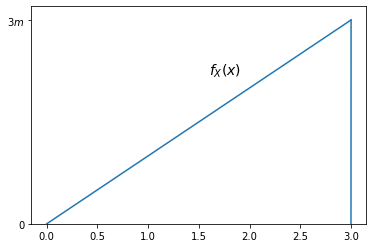

In [53]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,3,31)
plt.plot(x, 10*x, color='C0')
plt.plot([2.999,3], [0,30], color='C0')

plt.ylim(0,32)
plt.yticks(ticks = [0,30], labels=['0', '$3m$']);
plt.text(1.6, 22, '$f_X(x)$', size=14);

Note that I left a parameter $m$ in the density, where $m$ is the slope of the line.  We should be able to figure out $m$ from what we know about the pdf. In particular, the pdf must integrate to 1. Rather than carry out that integration by hand, let's use a library called SymPy. We will import it as `sp`:

In [50]:
import sympy as sp

The first thing we will usually do when we work with SymPy is to tell it what our variables are. We do this by using either the `Symbol()` or `symbols()` methods. I recommend always using `symbols()` because it works for one or multiple symbols. The syntax is pretty straightforward. We pass it a string whose contents are a comma separated value of names of variables. The output is a tuple of SymPy variables that are usually passed to Python variables of the same name. It is confusing to write out but easy to understand in code. Let's create SymPy variables for $x$ (a value of $X$) and for $m$, the unknown constant:

In [55]:
x, m = sp.symbols("x,m")

Now we can define our function. For this first version, let's ignore the fact that the function really needs to be defined piecewise -- we will just do all our computation on $[0, 3]$. Since the function is linear in $x$ with slope $m$, it is just $f_X(x) = mx$ on $[0, 3]$. In SymPy, we can write

In [56]:
fX1 = m*x

Let's integrate the density function on $[0,10]$ to find the total probability as a function of $m$. Mathematically, we would write

$$
\int_{0}^{3} f_X(x) ~dx = \int_{0}^{3} mx ~dx =1.
$$

In SymPy, we can use the `integrate()` function. The first argument of `integrate()` is the function to be integrated. The second argument is either:
* *For indefinite integrals:* the variable to be integrated, or
* *For definite integrals:* a tuple containing the variable to be integrated, the lower limit of integration, and the upper limit of integration.
To find the value of $m$, we need to calculate the definite integral as $x$ goes from 0 to 13, so the integral can be calculated using SymPy as

In [57]:
sp.integrate(fX1, (x, 0, 3) )

9*m/2

The result is $9m/2$. This is not hard to verify. We could calculate out the integral by hand, or we could simply observe that we are finding the area of a triangle with base $b=3$ and height $h=3m$. Since the area of a triangle is $bh/2$, the result is $9m/2$.

We want $f_X(x)$ to be a valid pdf, so we require $9m/2=1$, or $m = 2/9$. Let's make a new version of $f_X(x)$ in SymPy with  this substitution. Rather than manually substituting it, I will show you how to let SymPy do the work for you.  We can put in `2/9` for the upper bound, but the result will be converted to a decimal. SymPy can work with fractions if instead of 2/9, we pass 'sp.Rational(2,9)' to tell SymPy to use the rational form of 2/9:

In [65]:
fX = fX1.subs(m, sp.Rational(2,9) )
fX

2*x/9

Let's confirm that `fX` now integrates to 1:

In [66]:
sp.integrate(fX, (x, 0, 3) )

1

Now we are ready to find the expected value $E[X]$. From {doc}`expected-value`, the expected value of a continuous random variable $X$ is

$$
E[X] = \int_{-\infty}^{\infty} x f_X(x)~dx.
$$
Again, we will ignore the parts of the integral where $f_X(x)=0$. Then this is easy to carry out in SymPy:

In [67]:
sp.integrate(x * fX, (x, 0, 3) )

2

So the mean, or expected value of $X$ is 2. This seems reasonable, since it is in the middle of the variable's range but is skewed more toward the right, where there is more density.

## What Expected Value Does Not Mean

**Or what the *mean* doesn't mean!**

**1.** The mean is not the most likely value to occur. The value with the highest density is $3$. For a continuous random variable, all the values occur with probability 0, but the probability of getting values close to 3 is higher than the probability of getting values close to 2. 

The value 3 is the *mode* of $X$:

````{card}
DEFINITION
^^^
```{glossary}
mode (of a random variable)
    The value with the highest probability (for a discrete random variable) or the highest probability density (for a continuous random variable).
```
````


**2.** The mean is not the value in the middle of the distribution. Since the range of $X$ is $[0,3]$, the value in the middle of the distribution is 1.5.

**3.** The mean is not the value that splits the probability of the distribution equally. We can solve for that value using SymPy:

First, note that we are looking for the point $c$ such that $P(X \le c) = P(X>c)$. Since those two probabilities add to 1, we can simply find $c$ such that $P(X \le c) = 1/2$. 

Second, note that $P(X \le c)$ is in the form of the CDF, $F_X(x) = P(X \le x)$. Let's find the CDF of $X$ using indefinite integration on the density function:



In [69]:
FX = sp.integrate(fX, x)
FX

x**2/9

Note that the pdf is the derivative of the CDF, so if we ever have a CDF and need to get the pdf, we can take the derivative using SymPy's `sp.diff()` function. The arguments of `sp.diff()` are the function and the variable to differentiation:

In [72]:
sp.diff(FX, x)

2*x/9

Note that $F_X(x)$ is a quadratic function. We can solve for the value by hand, or we can use SymPy's `sp.nonlinsolve()` function. The arguments of `sp.nonlinsolve()` are a list of functions that must evaluate to 0 and a list of arguments to be found. First we need to rewrite the function we are going to solve to get it in the right form:

\begin{align*}
F_X(c) &= \frac 1 2 \\
F_X(c) - \frac 1 2 &= 0\\
\end{align*}

Now we can use `sp.nonlinsolve()`:

In [76]:
solns = sp.nonlinsolve([FX.subs(x, c) - sp.Rational(1,2) ], [c])
solns

{(-3*sqrt(2)/2,), (3*sqrt(2)/2,)}

Since this is a quadratic equation, there are two answers, but only one is in $[0,3]$. We can get the floating point values by iterating over `solns`, getting the first (and only) element of each returned tuple, and using `sp.N()` to convert the result to a float:

In [89]:
for x in solns:
  print(sp.N(x[0]))

-2.12132034355964
2.12132034355964


This is not the mean, this is the *median*:

````{card}
DEFINITION
^^^
```{glossary}
median (of a random variable)
    For a random variable $X$ with distribution function $F_X(x)$, the median is a value $\tilde{X}$ such that $P\left(X \le \tilde{X} \right) = P\left(X > \tilde{X}\right)$. An equivalent condition is $F_X\left(\tilde{X} \right) = 1/2$. The median is not necessarily unique.
```
````






So, the mean is not necessarily equal to the median.

Now that we have the tools to calculate expected values of continuous random variables, in the next section we study moments, which are expected values of powers of a random variable.